In [1]:
import sys
sys.path.append("./utils/") # Adds higher directory to python modules path.
import random
import numpy as np
import cv2
import yaml
import glob, os
import loadcoraldata_utils as coralutils
import json
import importlib
from NeMO_generator import NeMOImageGenerator, ImageSetLoader
from osgeo import gdal
from sklearn.manifold import TSNE

from matplotlib import colors
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib notebook

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [ ]:
# Fill in truth maps as taken from Jarrett's submissions
# imagepath = "F:/Images/processed_Fiji_files"
startpath = "../Images/PlanetTruth_Fiji" # Where uncorrected classifications from Jarrett are stored
rasterfile = startpath + "/CoralInfo2.txt"

# finalpath_RGB = "../Images/Jarrett_submissions2/Original"
finalpath_patch = "../Images/Alan_TestSet/Patches"
finalpath_truthmap = "../Images/Alan_TestSet/RGB_Truthmap"

files = [os.path.join(startpath,f) for f in os.listdir(startpath) if os.path.isfile(os.path.join(startpath,f)) and f.endswith(".png")]
files = sorted(files)

file_info = open(rasterfile)
counter = 0
for f in files:
    # get mosaic info
    line = file_info.readline()
    linesplit = line.split(" ")
    xpixel = int(linesplit[-1])
    ypixel = int(linesplit[-2])
    mosaic_path = " "
    mosaic_path = mosaic_path.join(linesplit[:-2])
    mosaic_file = mosaic_path.split("/")
    mosaic

In [4]:
# Fill in truth maps as taken from Jarrett's submissions
# imagepath = "F:/Images/processed_Fiji_files"
startpath = "../Images/PlanetTruth_Fiji" # Where uncorrected classifications from Jarrett are stored
rasterfile = startpath + "/CoralInfoFinal.txt"

# finalpath_RGB = "../Images/Jarrett_submissions2/Original"
finalpath_patch = "../Images/Alan_TestSet/Patches_BGR"
finalpath_truthmap = "../Images/Alan_TestSet/Truthmap_RGB"

files = [os.path.join(startpath,f) for f in os.listdir(startpath) if os.path.isfile(os.path.join(startpath,f)) and f.endswith(".png")]
files = sorted(files)

file_info = open(rasterfile)
counter = 0
for f in files:
    # get mosaic info
    line = file_info.readline()
    linesplit = line.split(" ")
    xpixel = int(linesplit[-1])
    ypixel = int(linesplit[-2])
    offset = 128
    image_size = 256
    mosaic_path = " "
    mosaic_path = mosaic_path.join(linesplit[:-2])
        
    fillmap = coralutils.fill_in_truthmap(f, 3, nofillcolor=np.asarray([0,0,0]))
    filestr = "Coral_" + str(counter).zfill(8) + ".png"
    cv2.imwrite(os.path.join(finalpath_truthmap,filestr), fillmap)
    
    raster = coralutils.CoralData(mosaic_path, load_type="raster")
    patch = raster.image[ypixel+offset:ypixel+offset+image_size, xpixel+offset:xpixel+offset+image_size, :]
    projection = raster.projection
    geotransform = [g for g in raster.geotransform]
    geotransform[0] = geotransform[0] + offset*geotransform[1]
    geotransform[3] = geotransform[3] + offset*geotransform[5]
    
    if "Planet" in mosaic_path:
        patch_R = 0.01*patch[:,:,2]
        patch_G = 0.01*patch[:,:,1]
        patch_B = 0.01*patch[:,:,0]
    else:
        patch_R = 255/200*patch[:,:,4]
        patch_G = 255/200*patch[:,:,2]
        patch_B = 255/200*patch[:,:,1]
    patch_R[patch_R > 255] = 255
    patch_G[patch_G > 255] = 255
    patch_B[patch_B > 255] = 255
    patch_BGR = np.rollaxis(np.asarray([patch_B, patch_G, patch_R], dtype=np.uint8),0,3)
    cv2.imwrite(os.path.join(finalpath_patch,filestr), patch_BGR)
    
    counter += 1
    print("Finished output for " + str(counter) + " images")

file_info.close()


# print(rasterfile)
# image_size = 256
# offset = 128

# alldir = [os.path.join(startpath,o) for o in os.listdir(startpath) if os.path.isdir(os.path.join(startpath,o))]
# counter = 0
# for d in alldir:
#     files = [f for f in os.listdir(d) if os.path.isfile(os.path.join(d,f))]
#     for f in files:
#         fillmap = coralutils.fill_in_truthmap(os.path.join(d,f), 3, nofillcolor=np.asarray([0,0,0]))
#         filestr = "Coral_" + str(counter).zfill(8) + ".png"
#         cv2.imwrite(os.path.join(finalpath_truthmap,filestr), fillmap)
#         if f.endswith(".tiff"):
#             temp_f = f[:-1] # turn .tiff to .tif
#         else:
#             temp_f = f
        
#         filestr = "Coral_" + str(counter).zfill(8) + ".tif"
#         patch, patch_proj, patch_gt = coralutils.load_specific_patch(imagepath, temp_f, rasterfile, image_size, offset=offset)
#         patch_R = 255/200*patch[:,:,4]
#         patch_G = 255/200*patch[:,:,2]
#         patch_B = 255/200*patch[:,:,1]
#         patch_R[patch_R > 255] = 255
#         patch_G[patch_G > 255] = 255
#         patch_B[patch_B > 255] = 255
#         patch_BGR = np.rollaxis(np.asarray([patch_B, patch_G, patch_R], dtype=np.uint8),0,3)
#         cv2.imwrite(os.path.join(finalpath_RGB,filestr), patch_BGR)
        
#         driver = gdal.GetDriverByName('GTiff')
#         dataset = driver.Create(finalpath_patch + "/" + filestr, image_size, image_size, patch.shape[2], gdal.GDT_Float32)
#         for chan in range(patch.shape[2]):
#             dataset.GetRasterBand(chan+1).WriteArray((patch[:,:,chan]-100)/100)
#             dataset.FlushCache()
        
#         counter += 1
#         print("Finished output for " + str(counter) + " images")

Finished output for 1 images
Finished output for 2 images
Finished output for 3 images
Finished output for 4 images
Finished output for 5 images
Finished output for 6 images
Finished output for 7 images
Finished output for 8 images
Finished output for 9 images
Finished output for 10 images
Finished output for 11 images
Finished output for 12 images
Finished output for 13 images
Finished output for 14 images
Finished output for 15 images
Finished output for 16 images
Finished output for 17 images
Finished output for 18 images
Finished output for 19 images
Finished output for 20 images
Finished output for 21 images
Finished output for 22 images
Finished output for 23 images
Finished output for 24 images
Finished output for 25 images
Finished output for 26 images
Finished output for 27 images
Finished output for 28 images
Finished output for 29 images


In [3]:
jsonpath = './utils/CoralClasses.json'
finalpath_truthmap = "../Images/Alan_TestSet/Truthmap_RGB"
graypath = '../Images/Alan_TestSet/Truthmap_Gray'

with open(jsonpath) as json_file:
    json_data = json.load(json_file)
cmap_Ved = colors.ListedColormap(['#ff81C0', '#720068', '#d1b26f', '#69b300', '#ff1300', '#0343df',
                                '#ffff00', '#f97306', '#33b2cc'])
coralutils.transform_RGB2Gray(finalpath_truthmap, graypath, cmap_Ved, json_data["VedConsolidated_ClassDict"])

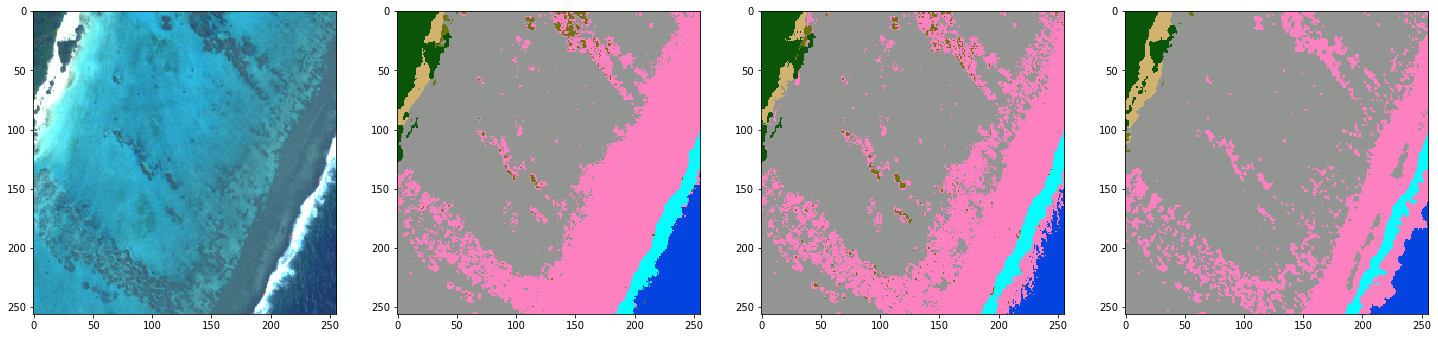

In [16]:
cmap_Ved = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                                'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])
bounds = [i+0.5 for i in range(10)]
norm = colors.BoundaryNorm([b+0.5 for b in bounds], cmap_Ved.N)

filename = "Coral_00000021.png"
filepath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/Patches_BGR/" + filename
filepathclassify = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/NeMOmap_Final/" + filename
filepathnemo = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/VGG16_Final/" + filename
filepathtruth = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/Truthmap_Gray/" + filename
Fijitest = coralutils.CoralData(filepath, load_type="cv2")
classifyimage = np.asarray(cv2.imread(filepathclassify, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
nemoimage = np.asarray(cv2.imread(filepathnemo, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
truthimage = np.asarray(cv2.imread(filepathtruth, cv2.IMREAD_UNCHANGED), dtype=np.uint8)


patch_R = Fijitest.image[:,:,2]
patch_G = Fijitest.image[:,:,1]
patch_B = Fijitest.image[:,:,0]
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255

Fiji_RGB = np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3)
Fiji_RGB[Fiji_RGB > 255] = 255

fig = plt.figure(1,figsize=(25,7))
ax = plt.subplot(1,4,1)
ax.imshow(Fiji_RGB)
ax = plt.subplot(1,4,2)
ax.imshow(np.round(classifyimage.astype(np.float32)*3/85), interpolation='nearest', cmap=cmap_Ved, norm=norm)
ax = plt.subplot(1,4,3)
ax.imshow(np.round(nemoimage.astype(np.float32)*3/85), interpolation='nearest', cmap=cmap_Ved, norm=norm)
ax = plt.subplot(1,4,4)
ax.imshow(np.round(truthimage.astype(np.float32)*3/85), interpolation='nearest', cmap=cmap_Ved, norm=norm)



[ 28  56  85 113 141 170 226]
[ 28  56  85 113 141 170 226 255]


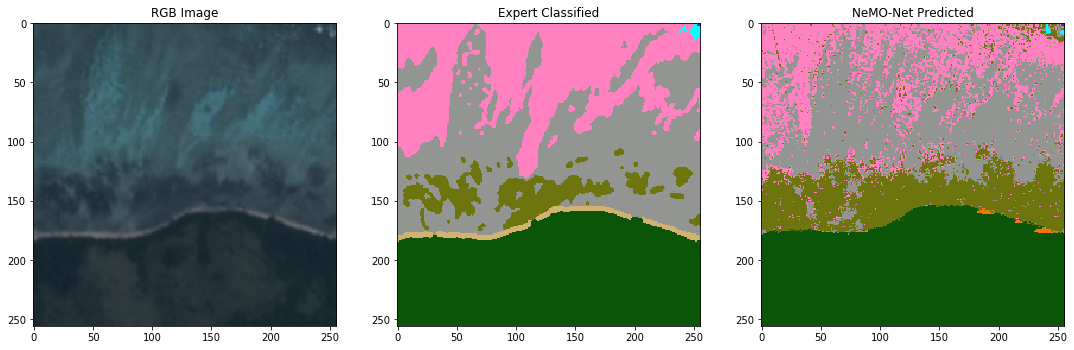

In [25]:
cmap_Ved = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                                'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])
bounds = [i+0.5 for i in range(10)]
norm = colors.BoundaryNorm([b+0.5 for b in bounds], cmap_Ved.N)

imagefile = "Coral_00000014.png"
imagepath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/Patches_BGR/" + imagefile
truthpath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/Truthmap_Gray/" + imagefile
nemopath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/VGG16_Final/" + imagefile
lofpath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/LOFmap_Gray/" + imagefile
nemoimage = np.asarray(cv2.imread(nemopath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
grayimage = np.asarray(cv2.imread(truthpath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
RGBimage = np.asarray(cv2.imread(imagepath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)

fig = plt.figure(2,figsize=(25,7))
ax = plt.subplot(1,4,1)
ax.title.set_text('RGB Image')
ax.imshow(RGBimage[:,:,2::-1])

ax = plt.subplot(1,4,2)
# ax.imshow(grayimage, cmap='gray', vmin=0, vmax=255)
ax.title.set_text('Expert Classified')
ax.imshow(np.round(grayimage.astype(np.float32)*3/85), interpolation='nearest', cmap=cmap_Ved, norm=norm)
print(np.unique(grayimage))

ax = plt.subplot(1,4,3)
ax.title.set_text('NeMO-Net Predicted')
ax.imshow(np.round(nemoimage.astype(np.float32)*3/85), interpolation='nearest', cmap=cmap_Ved, norm=norm)
print(np.unique(nemoimage))

if os.path.exists(lofpath):
    LOFimage = np.asarray(cv2.imread(lofpath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
    ax = plt.subplot(1,4,4)
    ax.title.set_text('LOF Map')
    ax.imshow(np.round(LOFimage.astype(np.float32)*3/85), interpolation='nearest', cmap=cmap_Ved, norm=norm)
    print(np.unique(LOFimage))
plt.show()


Confusion matrix, without normalization
[[ 80205  16421      0    189      0     41      1    708      0]
 [ 19704 133275    538   6581      7      3      0      0      0]
 [     0      1   2323      0     91      0      0      0      0]
 [  4533   3237    232  30048      1    141      0      0      0]
 [     0      0    179      0  11147      0      0      0     29]
 [   306     83      0    219      0   9506      0    503      0]
 [     0      0      0      0      0      0      0      0      0]
 [    96    141      0      0      0      4      0   7023      0]
 [     0      0      0      0    161      0      0      0      3]]
Total accuracy:  0.834747314453125
Mean precision:  0.6734247708408266
Mean recall:  0.6961438394121056
Frequency weighted IOU:  0.7184104646464267


/home/asli/NeMO-Test/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/asli/NeMO-Test/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


Normalized confusion matrix
[[8.22e-01 1.68e-01 0.00e+00 1.94e-03 0.00e+00 4.20e-04 1.02e-05 7.26e-03
  0.00e+00]
 [1.23e-01 8.32e-01 3.36e-03 4.11e-02 4.37e-05 1.87e-05 0.00e+00 0.00e+00
  0.00e+00]
 [0.00e+00 4.14e-04 9.62e-01 0.00e+00 3.77e-02 0.00e+00 0.00e+00 0.00e+00
  0.00e+00]
 [1.19e-01 8.48e-02 6.07e-03 7.87e-01 2.62e-05 3.69e-03 0.00e+00 0.00e+00
  0.00e+00]
 [0.00e+00 0.00e+00 1.58e-02 0.00e+00 9.82e-01 0.00e+00 0.00e+00 0.00e+00
  2.55e-03]
 [2.88e-02 7.82e-03 0.00e+00 2.06e-02 0.00e+00 8.95e-01 0.00e+00 4.74e-02
  0.00e+00]
 [     nan      nan      nan      nan      nan      nan      nan      nan
       nan]
 [1.32e-02 1.94e-02 0.00e+00 0.00e+00 0.00e+00 5.51e-04 0.00e+00 9.67e-01
  0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 9.82e-01 0.00e+00 0.00e+00 0.00e+00
  1.83e-02]]
Total accuracy:  nan
Coral, Sediment, Seagrass accuracy:  0.8277831219641528


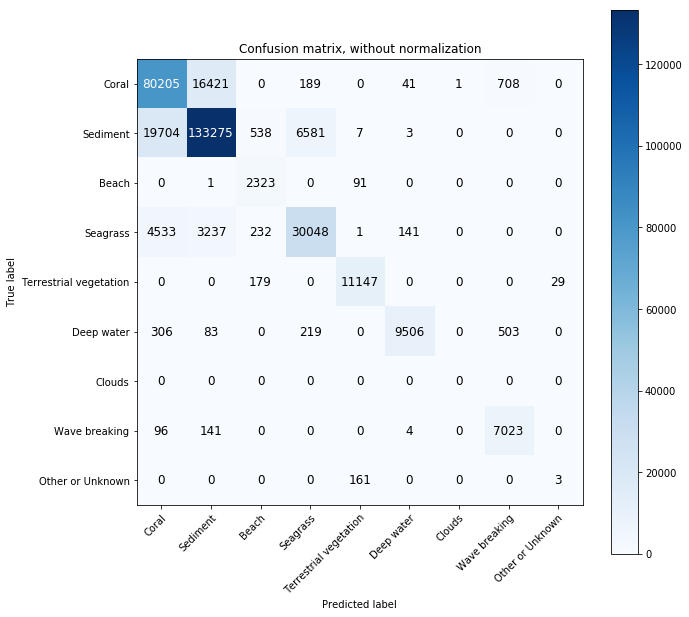

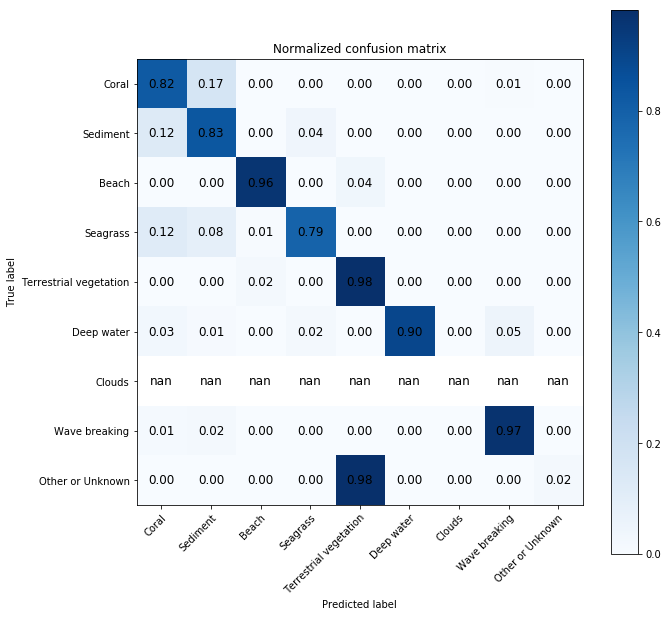

0.834747314453125

In [5]:
# Analyze Truth data
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print("Total accuracy: ", np.trace(cm)/np.sum(cm))

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), fontsize=12,
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
    return ax

GoodWV2Data = ['03', '04', '06', '07', '08']
BadWV2Data = ['00', '01', '02', '05']
GoodPlanetData = ['09', '10', '11', '14', '15', '18', '19']
BadPlanetData = ['12','13','16','17']
GoodWv2Data2 = ['20','21','22','23','24','25','26','27','28']

class_names = [cl for cl in json_data["VedConsolidated_ClassDict"]]
labelkey = json_data["VedConsolidated_ClassDict"]
class_indices_rev_Ved = dict((np.floor(v*255/9).astype(np.uint8),k) for k,v in labelkey.items()) #flip k,v

labels = [28, 56, 85, 113, 141, 170, 198, 226, 255]

truthdata = []
nemopredictdata = []
for WV in GoodWV2Data:
    imagefile = "Coral_000000" + WV + ".png"
    imagepath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/Patches_BGR/" + imagefile
    truthpath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/Truthmap_Gray/" + imagefile
    nemopath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/NeMOmap_NoCRF/" + imagefile
#     nemopath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/NeMOmap_RegressionTree/" + imagefile
#     nemopath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/DeepLab_Final/" + imagefile
    lofpath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/LOFmap_Gray/" + imagefile
    nemoimage = np.asarray(cv2.imread(nemopath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
    grayimage = np.asarray(cv2.imread(truthpath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
    RGBimage = np.asarray(cv2.imread(imagepath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
    if os.path.exists(lofpath):
        LOFimage = np.asarray(cv2.imread(lofpath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
        
    truthdata.append(grayimage.flatten())
    nemopredictdata.append(nemoimage.flatten())
           
truthdata = np.squeeze(np.asarray(truthdata)).flatten()
nemopredictdata = np.squeeze(np.asarray(nemopredictdata)).flatten()

unique_labels = [class_indices_rev_Ved[k] for k in unique_labels(truthdata,nemopredictdata)]
np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
plot_confusion_matrix(truthdata, nemopredictdata, classes=unique_labels, title='Confusion matrix, without normalization')
cm = confusion_matrix(truthdata, nemopredictdata)

# if cm.shape[0] == 9:
#     cm = np.delete(cm, 6, 1)
#     cm = np.delete(cm, 6, 0)
precision = [cm[i,i]/np.sum(cm[:,i]) for i in range(cm.shape[0])]
recall = [cm[i,i]/np.sum(cm[i,:]) if np.sum(cm[i,:]) != 0 else 0 for i in range(cm.shape[0])]
print("Mean precision: ", np.mean(precision))
print("Mean recall: ", np.mean(recall))
# Frequency weighted IOU
ti = [np.sum(cm[:,i]) for i in range(cm.shape[0])]
WIOU = [ti[i] * (cm[i,i]/(ti[i] - cm[i,i] + np.sum(cm[i,:]))) for i in range(cm.shape[0])]
FIOU = 1/np.sum(ti) * np.sum(WIOU)
print("Frequency weighted IOU: ", FIOU)


plot_confusion_matrix(truthdata, nemopredictdata, classes=unique_labels, normalize=True, title='Normalized confusion matrix')

smallcm = np.asarray([[cm[0,0], cm[0,1], cm[0,3]], [cm[1,0], cm[1,1], cm[1,3]], [cm[3,0], cm[3,1], cm[3,3]]])
smallaccuracy = np.trace(smallcm)/np.sum(smallcm)
print("Coral, Sediment, Seagrass accuracy: ", smallaccuracy)

    # Plot normalized confusion matrix
# plot_confusion_matrix(truthdata, nemopredictdata, classes=unique_labels, normalize=True, title='Normalized confusion matrix')
plt.show()

f1_score(truthdata, nemopredictdata, average='micro')

Confusion matrix, without normalization
[[87064 10254     0   247     0     0     0     0]
 [70430 80990   117  8565     6     0     0     0]
 [  610    53  1532   183    37     0     0     0]
 [ 7100   441    23 30628     0     0     0     0]
 [  288     5   622    80 10314     0     0    46]
 [ 7849     0     0     0     0  2768     0     0]
 [ 7264     0     0     0     0     0     0     0]
 [    0     0     0     0    47     0     0   117]]
Total accuracy:  0.6512847900390625
Normalized confusion matrix
[[8.92e-01 1.05e-01 0.00e+00 2.53e-03 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [4.40e-01 5.06e-01 7.31e-04 5.35e-02 3.75e-05 0.00e+00 0.00e+00 0.00e+00]
 [2.53e-01 2.19e-02 6.34e-01 7.58e-02 1.53e-02 0.00e+00 0.00e+00 0.00e+00]
 [1.86e-01 1.15e-02 6.02e-04 8.02e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [2.54e-02 4.40e-04 5.48e-02 7.05e-03 9.08e-01 0.00e+00 0.00e+00 4.05e-03]
 [7.39e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.61e-01 0.00e+00 0.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 0.00e+00

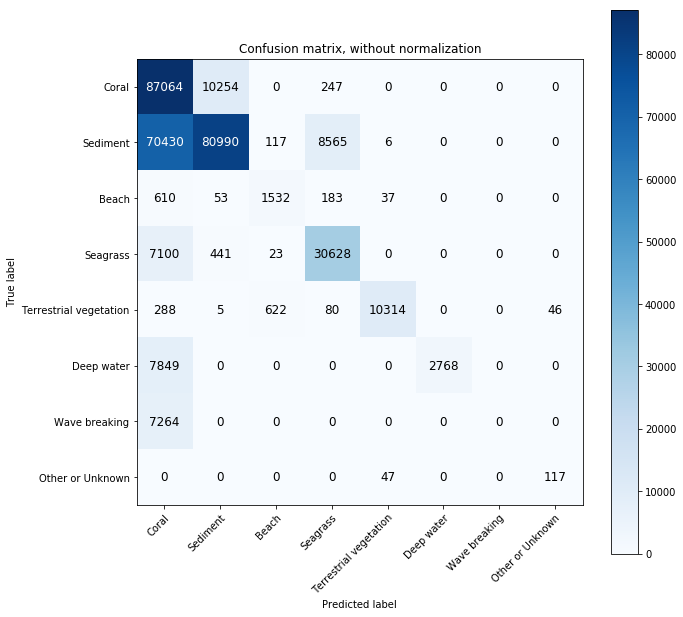

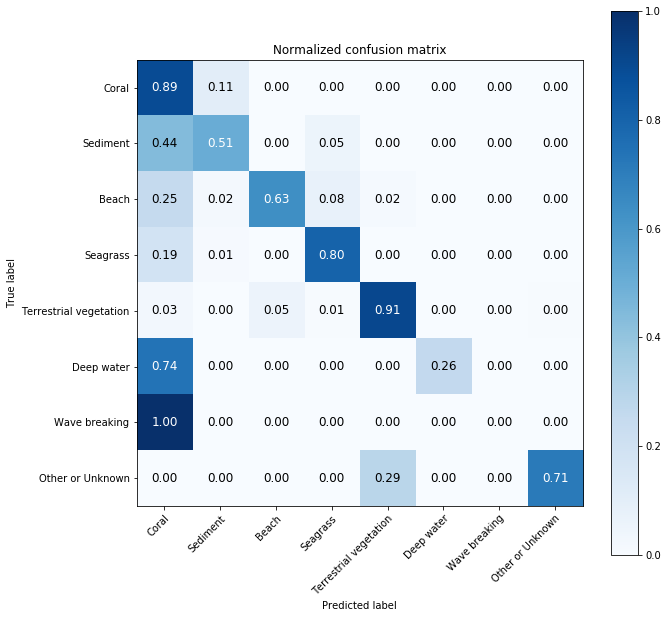

In [7]:
from sklearn.utils.multiclass import unique_labels

labelkey = json_data["VedConsolidated_ClassDict"]
class_indices_rev_Ved = dict((np.floor(v*255/9).astype(np.uint8),k) for k,v in labelkey.items()) #flip k,v

truthdata = []
LOFdata = []
for WV in GoodWV2Data:
    imagefile = "Coral_000000" + WV + ".png"
    imagepath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/Patches_BGR/" + imagefile
    truthpath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/Truthmap_Gray/" + imagefile
#     nemopath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/NeMOmap_Gray/" + imagefile
    lofpath = "/home/asli/NeMO-Test/NeMO-NET/Images/Alan_TestSet/LOFmap_Gray/" + imagefile
#     nemoimage = np.asarray(cv2.imread(nemopath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
    grayimage = np.asarray(cv2.imread(truthpath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
    RGBimage = np.asarray(cv2.imread(imagepath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
    if os.path.exists(lofpath):
        LOFimage = np.asarray(cv2.imread(lofpath, cv2.IMREAD_UNCHANGED), dtype=np.uint8)
        
    truthdata.append(grayimage.flatten())
    LOFdata.append(LOFimage.flatten())
           
truthdata = np.squeeze(np.asarray(truthdata)).flatten()
LOFdata = np.squeeze(np.asarray(LOFdata)).flatten()

unique_labels = [class_indices_rev_Ved[k] for k in unique_labels(truthdata,LOFdata)]
np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
plot_confusion_matrix(truthdata, LOFdata, classes=unique_labels, title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
plot_confusion_matrix(truthdata, LOFdata, classes=unique_labels, normalize=True, title='Normalized confusion matrix')
plt.show()

# f1_score(truthdata, nemopredictdata, average='macro')

In [39]:
# Notes on Transects:
# Mosaic 1-3 Cicia (5012 x 5633)
# Mosaic 4-7 Fulaga (4:80% east, 7: Spectrally poor) (5869 x 6222)
# Mosaic 8-13 Kobara(8: 20% west, 9: 20% left, 12:70% east) (5804 x 4263)
# Mosaic 14 Mago (4424 x 4276)
# Mosaic 15-18 Matuka (7850 x 7343)
# Mosaic 19-22 Moala (19: 10% Very Incomplete, 20: 70% east, 21: 30% west, 22: 20% South Spectrally poor) (7987 x 6950)
# Mosaic 23-25 Nayau (3977 x 3822)
# Mosaic 26-32 Totoya (26: 80% west, 27: 70% west, 28: 20% east, 29: 60% east, 30: 30% east, 31: 80% west, 32: 80% west) (10751 x 7576)
# Mosaic 33 Tuvuca (4915 x 4517)
# Mosaic 34-38 Vanua Balavu # Way too big (20829 x 9441)
# Mosaic 39-41 Vanua Vatu (40: 50% east, 41: 50% west) (3801 x 3592)

imgpath = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_040.TIF'
img = gdal.Open(imgpath)
try:
    self.projection = img.GetProjection()
except Exception:
    pass
xsize = img.RasterXSize
ysize = img.RasterYSize

print(ysize, xsize)

a = (5012*5633 + 5869*6222 + 5804*4263 + 4424*4276 + 7850*7343 + 7987*6950 + 3977*3822 + 10751*7576 + 4915*4517 + 20829*9441 + 3801*3592)*(2*2)/(1000*1000)
print(a)

3737 2010
2202.846784
